## Radial Basis Function Neural Network
Son redes que se usan justamente para hacer regresión o aproximación de funciones.<br> 
El conjunto de entradas en una RBF están completamente conexas a las neuronas de la capa intermedia en las cuales se utiliza una función Gaussiana como función de activación (esto es lo que las difrencia de una red MLP).

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.random import check_random_state
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Ejemplo RBFNN
Se aplicará una RBFNN para predecir la distancia entre un par de puntos (x,y) y (x1,y1), uno de ellos constante.$$ d = \sqrt{(x1-x)^2 + (y1 - y)^2} $$

### Generar el conjunto de datos
Para generar el conjunto de datos se calculará la distancia entre un conjunto de 5000 puntos (x,y) aleatorios, así, el modelo de regresión se ajustará a una proporción del 80% del conjunto y el 20% restante estará destinado a la predicción.

In [33]:
def calcular_distancia(X,Y,XF,YF):
    return np.round(np.sqrt(np.power(XF-X,2)+np.power(YF-Y,2)),2)

XF = 5
YF = 12.5

rng = check_random_state(0)

X = np.round(rng.uniform(1, 11, 10000).reshape(5000, 2),2)
XFs=[[XF] for i in range(5000)]
YFs=[[YF] for i in range(5000)]
X=np.append(X, XFs, axis=1)
X=np.append(X, YFs, axis=1)
Y = calcular_distancia(X[:, 0],X[:, 1],XF,YF)
Y = Y.reshape(-1,1)

### Proceso de transformación
Es una práctica común, en las redes neuronales, normalizar el conjunto de datos de entrenamiento, pues se ha demostrado que las redes neuronales aprenden mejor con valores pequeños entre 0 y 1.

In [34]:
def transformar(X,Y):
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    x_scale = scaler_x.fit_transform(X)
    y_scale = scaler_y.fit_transform(Y)
    return (x_scale,y_scale)

In [35]:
class RBF:
     
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [np.random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = np.random.random((self.numCenters, self.outdim))
         
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return np.exp(-self.beta * np.linalg.norm(c-d)**2)
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        G = np.zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        rnd_idx = np.random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
         
        #print ("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        #print (G)
         
        # calculate output weights (pseudoinverse)
        self.W = np.dot(pinv(G), Y)
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = np.dot(G, self.W)
        return Y



### Particionamiento del conjunto de aprendizaje
Se usará el 80% del conjunto en el entrenamiento y el 20% de los datos estará destinado a la prueba del modelo 

In [38]:
x_scale,y_scale = transformar(X, Y)
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, train_size=0.8, test_size=0.2, random_state=42)

### Proceso de entrenamiento y prueba del modelo

RMSE =  0.11266744614065659


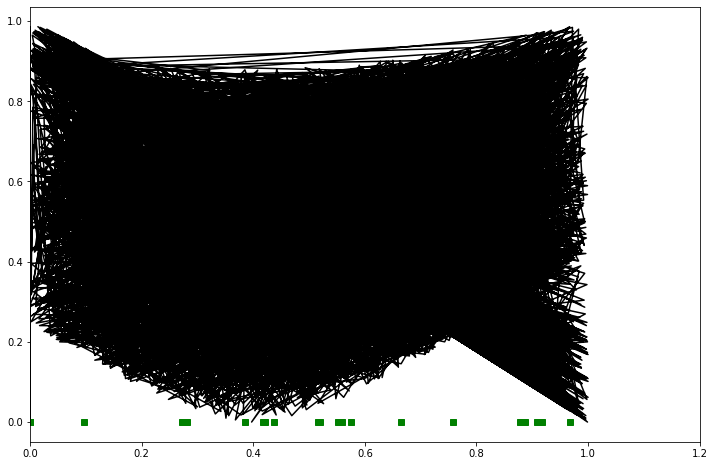

In [42]:
 # rbf regression
rbf = RBF(4, 10, 1)
rbf.train(x_train, y_train)
yhat = rbf.test(x_test)
       
rmse = np.sqrt(mean_squared_error(y_test,yhat))
print("RMSE = ", rmse)


# plot original data
plt.figure(figsize=(12, 8))
plt.plot(x_train, y_train, 'k-')
     
# plot learned model
#plt.plot(x_test, yhat, 'r-', linewidth=2)
     
# plot rbfs
plt.plot(rbf.centers, np.zeros(rbf.numCenters), 'gs')
     
#for c in rbf.centers:
#    # RF prediction lines
#    cx = arange(c-0.7, c+0.7, 0.01)
#    cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
#    plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
plt.xlim(0, 1.2)
plt.show()

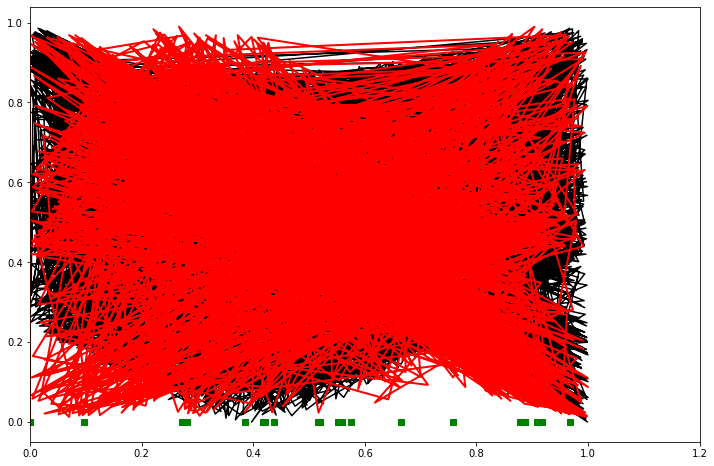

In [43]:
# plot original data
plt.figure(figsize=(12, 8))
plt.plot(x_train, y_train, 'k-')
     
# plot learned model
plt.plot(x_test, yhat, 'r-', linewidth=2)
     
# plot rbfs
plt.plot(rbf.centers, np.zeros(rbf.numCenters), 'gs')
     
#for c in rbf.centers:
#    # RF prediction lines
#    cx = arange(c-0.7, c+0.7, 0.01)
#    cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
#    plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
plt.xlim(0, 1.2)
plt.show()